# College graduate earnings and debt

This project utilizes data from https://collegescorecard.ed.gov/data/ -- 
The data is from all undergraduate degree-seeking institutions in the USA or its territories. Data relating to earnings, debts, and test scores of students can be found here.

In [1]:
# import all relevant libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

# ignore warnings that have no effect on code
warnings.filterwarnings('ignore')

# read an external CSV file into a Pandas Dataframe called 'scdf'
scdf = pd.read_csv("Most-Recent-Cohorts-Scorecard-Elements.csv")

This initial dataframe is quite large. We are going to create a smaller dataframe using only the columns we need from the 'scdf' dataframe. Once we do that, we will print out the first five rows of the new dataframe.

In [2]:
school_df = scdf[['UNITID','INSTNM','MD_EARN_WNE_P10', 'GRAD_DEBT_MDN_SUPP', 'STABBR']]
school_df.head()

,UNITID,INSTNM,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,STABBR
0,100654,Alabama A & M University,31000,32750,AL
1,100663,University of Alabama at Birmingham,41200,21833,AL
2,100690,Amridge University,39600,22890,AL
3,100706,University of Alabama in Huntsville,46700,22647,AL
4,100724,Alabama State University,27700,31500,AL


Using the data dictionary, we can get a clearer picture of what these variables mean

UNITID: This is the unique ID of each school

INSTNM: This is the institution's, or school's, name

MD_EARN_WNE_P10: This is the median earnings of all students working and not enrolled 10 years after entry to their respective university

GRAD_DEBT_MDN_SUPP: This is the median debt of graduates

STABBR: This is the state where the college is located

We need to clean this new dataframe a little bit.

In [3]:
# Replacing the string 'PrivacySuppressed' with 0
school_df['MD_EARN_WNE_P10'] = school_df['MD_EARN_WNE_P10'].replace('PrivacySuppressed', 0)
school_df['GRAD_DEBT_MDN_SUPP'] = school_df['GRAD_DEBT_MDN_SUPP'].replace('PrivacySuppressed', 0)
# Converting certain values to float
school_df['MD_EARN_WNE_P10'] = pd.to_numeric(school_df['MD_EARN_WNE_P10'])
school_df['GRAD_DEBT_MDN_SUPP'] = pd.to_numeric(school_df['GRAD_DEBT_MDN_SUPP'])
# Removing rows where debt or earnings is 0
school_df = school_df[school_df.GRAD_DEBT_MDN_SUPP != 0]
school_df = school_df[school_df.MD_EARN_WNE_P10 != 0]
# Sorting the dataframe by earnings, decending
school_df = school_df.sort_values(['MD_EARN_WNE_P10'], ascending = False)
# Creating a ratio of earnings divided by debt
school_df['EARN_DEBT_RATIO'] = school_df['MD_EARN_WNE_P10'] / school_df['GRAD_DEBT_MDN_SUPP']
# Printing the top 10 schools based on earnings
school_df.head(10)

,UNITID,INSTNM,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP,STABBR,EARN_DEBT_RATIO
3859,237880,West Virginia School of Osteopathic Medicine,224300.0,4800.0,WV,46.729167
3153,215123,Philadelphia College of Osteopathic Medicine,186100.0,5250.0,PA,35.447619
239,110699,University of California-San Francisco,143700.0,6500.0,CA,22.107692
973,145558,Rosalind Franklin University of Medicine and S...,132300.0,6000.0,IL,22.050000
2461,196255,SUNY Downstate Medical Center,127900.0,12500.0,NY,10.232000
2210,188526,Albany College of Pharmacy and Health Sciences,124700.0,27000.0,NY,4.618519
1970,179265,St. Louis College of Pharmacy,124100.0,19500.0,MO,6.364103
70,103778,Thunderbird School of Global Management,118000.0,20000.0,AZ,5.900000
1591,166656,MCPHS University,116000.0,27000.0,MA,4.296296
215,110398,University of California-Hastings College of Law,114700.0,3000.0,CA,38.233333


We are going to create a graph using MatPlotLib. This graph will show the top 10 colleges based on earnings of graduates 10 years after entering their respective university. 

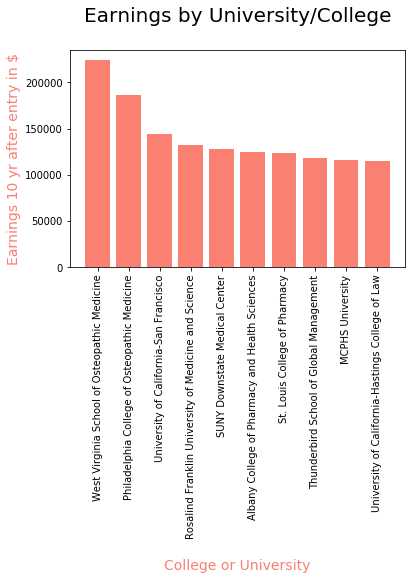

In [4]:
# Selecting values from our dataframe to create x and y axes
x = school_df['INSTNM'].iloc[:10]
y = school_df['MD_EARN_WNE_P10'].iloc[:10]

# Plotting these values in a bar plot
plt.bar(x,y, color = 'salmon')
plt.xticks(rotation=90)
plt.ylabel('Earnings 10 yr after entry in $', fontsize = 14, color = 'salmon')
plt.xlabel('\nCollege or University', fontsize = 14, color = 'salmon')
plt.title('Earnings by University/College\n', fontsize = 20)
plt.show()

We are now going to find the median earning value for each state

In [5]:
# Using Pandas groupby function to group by state
med = school_df.groupby(['STABBR'])['MD_EARN_WNE_P10'].median()
state_med = med.rename_axis('STABBR')
state_med.head()

STABBR
AK    37350.0
AL    32200.0
AR    27600.0
AZ    29800.0
CA    34800.0
Name: MD_EARN_WNE_P10, dtype: float64

We are going to find the median earning from all colleges across the nation

In [6]:
a = school_df['MD_EARN_WNE_P10'].dropna()
total_med = np.median(a)

We are going to create a function that will tell us what the earnings are for students based on state, and compared to the national median. This will help us locate higher performing states, and avoid lower performing states.

In [7]:
def state(x):
    '''
    Enter the two letter symbol for a state to search that state.
    
    This function compares earnings of students in a particular state
    to the national median
    '''
    if any(state_med.index == x):
        # Selecting the median value of the desired state
        med = state_med.loc[x]
        # Calculating the percentage difference from national median
        per = round(((med - total_med)/total_med)*100,2)
        # Conditional that adds 'higher' or 'lower' to the f-string in the next line
        response = "higher" if per > 0 else "lower"
        print("The median earnings 10 years after enrolling in a school in that state is", 
              "$"+str(med)+"0", "which\nis", str(per)+"%", response, "than the national median.")
    else:
        # If something other than a proper state abbreviation is entered, this statement is printed.
        print("Please enter a two letter state abbreviation, and be sure to put it in quotes. "
              "Go ahead, try it again.")

Let's try inputting Alaska into our function

In [8]:
state('AK')

The median earnings 10 years after enrolling in a school in that state is $37350.00 which
is 10.83% higher than the national median.


Great, that worked! Now let's try entering gibberish into the function to see what happens

In [9]:
state('asdf')

Please enter a two letter state abbreviation, and be sure to put it in quotes. Go ahead, try it again.


That didn't work, which is what we expected. Let's go ahead and try inputting a state that is below the national median.

In [10]:
state('AZ')

The median earnings 10 years after enrolling in a school in that state is $29800.00 which
is -11.57% lower than the national median.
